In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from vae import VAE
from data import *

from finch import FINCH
from sklearn.manifold import TSNE,Isomap
from sklearn.decomposition import PCA,FastICA
from sklearn.cluster import KMeans

/work0/zhangleilan/workplace/Neural_Topic_Models/finch.py:13: UserWarning: pyflann not installed: No module named 'index'
  warnings.warn('pyflann not installed: {}'.format(e))


In [2]:
taskname = 'cnews'

model_name ='VAE'
use_stopwords = True
batch_size = 256
n_topic = 10
msg = 'BCE'
run_name = '{}_K{}_{}_{}'.format(model_name,n_topic,taskname,msg)

In [3]:
train_loader,vocab,txtDocs = get_batch(taskname,use_stopwords,batch_size)

Taskname:cnews
build_bow is running...
179898 documents in total. Vocabulary size:16599
1.4431085586547852 s to finish build_bow.


In [4]:
cc,num_clust,req_c = FINCH(lattens,req_clust=10,verbose=True)

NameError: name 'lattens' is not defined

In [27]:
def draw_latten_space(taskname='cnews',model_name='VAE',n_topic=10,n_points=5000):
    use_stopwords = True
    batch_size = 256
    msg = 'BCE'
    run_name = '{}_K{}_{}_{}'.format(model_name,n_topic,taskname,msg)
    
    train_loader,vocab,txtDocs = get_batch(taskname,use_stopwords,batch_size)
    
    model = VAE(bow_size=len(vocab),h_dim=1024,z_dim=n_topic)
    
    model.load_state_dict(torch.load('ckpt/{}.model'.format(run_name)))
    model = model.cuda()
    
    latten = torch.tensor([]).cuda()
    cnt = 0
    for it in train_loader:
        it = it.cuda()
        out = model.encode(it)
        latten = torch.cat([latten,out[0]],dim=0)
        cnt += 1
        if cnt==20:
            break
    
    lattens = latten.cpu().detach().numpy()
    lattens = lattens[:n_points]
    
    #clustering
    cc,num_clust,req_c = FINCH(lattens,req_clust=n_topic,verbose=True)
    
    tsne1 = TSNE(n_components=2,random_state=42)
    draw1 = tsne1.fit_transform(lattens)

    plt.figure(figsize=(10,5))
    plt.scatter(draw1[:,0],draw1[:,1],c=req_c,s=7)
    plt.title('t-SNE for {} #Topic: {}'.format(taskname,n_topic))
    plt.show()

Taskname:cnews
build_bow is running...
179898 documents in total. Vocabulary size:16599
1.1264543533325195 s to finish build_bow.
Partition 0: 1454 clusters
Partition 1: 386 clusters
Partition 2: 195 clusters
Partition 3: 190 clusters


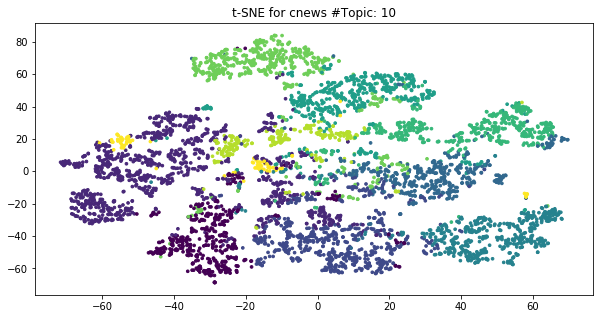

In [17]:
draw_latten_space(taskname='cnews',model_name='VAE',n_topic=10)

Taskname:cnews
build_bow is running...
179898 documents in total. Vocabulary size:16599
0.6085307598114014 s to finish build_bow.
Partition 0: 1186 clusters
Partition 1: 290 clusters
Partition 2: 61 clusters
Partition 3: 16 clusters
Partition 4: 9 clusters


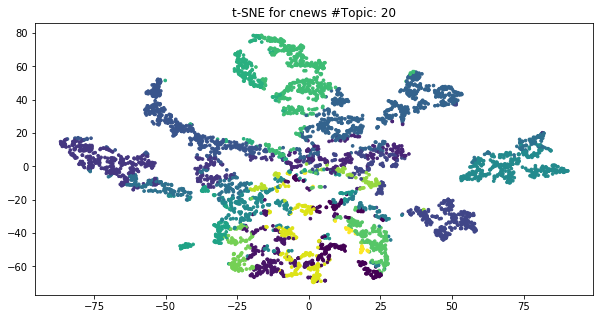

In [26]:
draw_latten_space(taskname='cnews',model_name='VAE',n_topic=20)

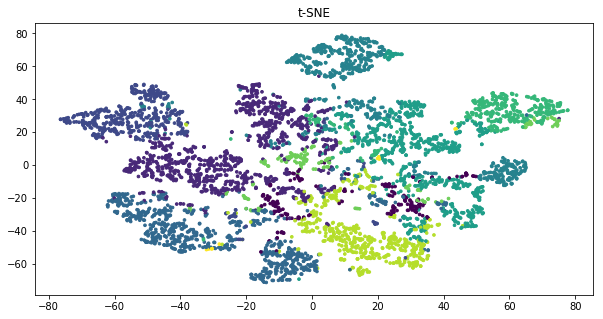

In [109]:
tsne1 = TSNE(n_components=2)
draw1 = tsne1.fit_transform(lattens)

plt.figure(figsize=(10,5))
plt.scatter(draw1[:,0],draw1[:,1],c=req_c,s=7)
plt.title('t-SNE')
plt.show()

In [115]:
'''
pca1 = PCA(n_components=2)
draw2 = pca1.fit_transform(lattens)

plt.figure(figsize=(10,5))
plt.scatter(draw2[:,0],draw2[:,1],c=req_c,s=7)
plt.title('PCA')
plt.show()
'''

"\npca1 = PCA(n_components=2)\ndraw2 = pca1.fit_transform(lattens)\n\nplt.figure(figsize=(10,5))\nplt.scatter(draw2[:,0],draw2[:,1],c=req_c,s=7)\nplt.title('PCA')\nplt.show()\n"

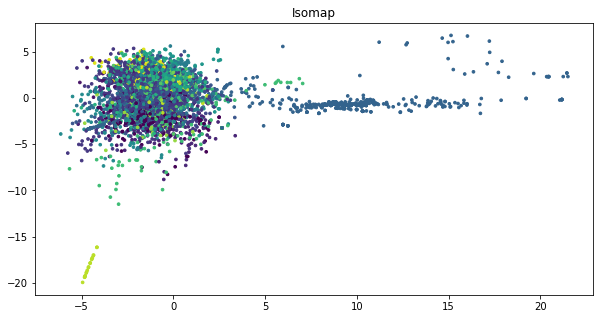

In [23]:

draw3 = Isomap(n_neighbors=5, n_components=2, n_jobs=-1).fit_transform(lattens)

plt.figure(figsize=(10,5))
plt.scatter(draw3[:,0],draw3[:,1],c=req_c,s=7)
plt.title('Isomap')
plt.show()


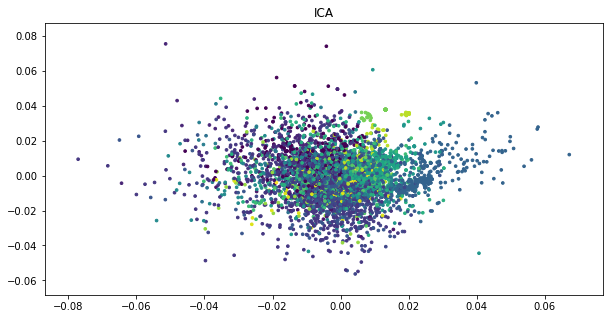

In [24]:

ica = FastICA(n_components=2, random_state=12) 
draw4 = ica.fit_transform(lattens)

plt.figure(figsize=(10,5))
plt.scatter(draw4[:,0],draw4[:,1],c=req_c,s=7)
plt.title('ICA')
plt.show()


Taskname:sub
build_bow is running...
53550 documents in total. Vocabulary size:12567
0.6988949775695801 s to finish build_bow.
Partition 0: 670 clusters
Partition 1: 114 clusters
Partition 2: 17 clusters
Partition 3: 4 clusters


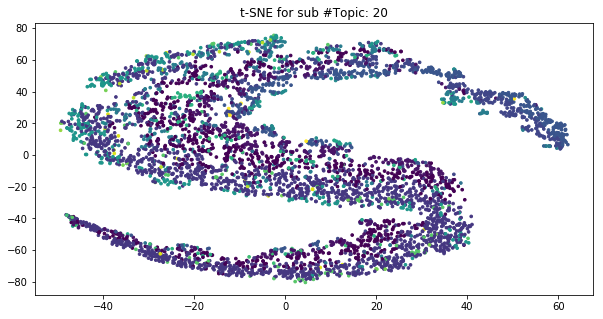

In [29]:
draw_latten_space(taskname='sub',model_name='VAE',n_topic=20)

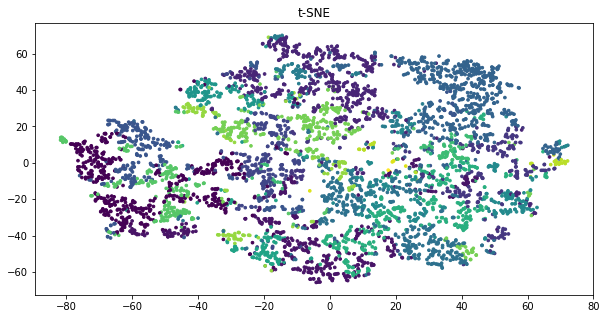

In [102]:
tsne1 = TSNE(n_components=2)
draw1 = tsne1.fit_transform(lattens)

plt.figure(figsize=(10,5))
plt.scatter(draw1[:,0],draw1[:,1],c=req_c,s=7)
plt.title('t-SNE')
plt.show()

Taskname:sub
build_bow is running...
53550 documents in total. Vocabulary size:12567
1.4949569702148438 s to finish build_bow.
Partition 0: 1329 clusters
Partition 1: 372 clusters
Partition 2: 96 clusters
Partition 3: 25 clusters
Partition 4: 23 clusters


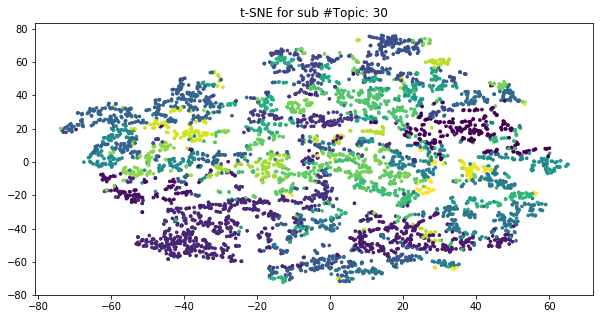

In [19]:
draw_latten_space(taskname='sub',model_name='VAE',n_topic=30)

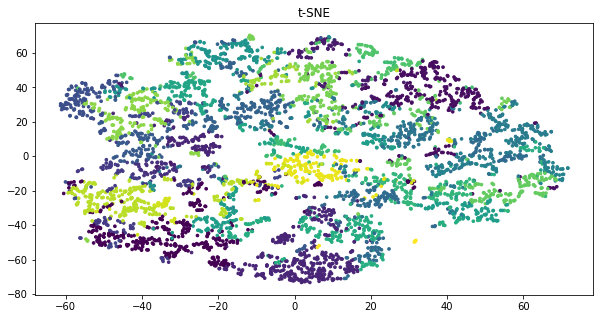

In [120]:
tsne1 = TSNE(n_components=2)
draw1 = tsne1.fit_transform(lattens)

plt.figure(figsize=(10,5))
plt.scatter(draw1[:,0],draw1[:,1],c=req_c,s=7)
plt.title('t-SNE')
plt.show()

Taskname:subX
build_bow is running...
264717 documents in total. Vocabulary size:38631
2.703991413116455 s to finish build_bow.
Partition 0: 1371 clusters
Partition 1: 353 clusters
Partition 2: 116 clusters
Partition 3: 72 clusters
Partition 4: 69 clusters
Partition 5: 67 clusters


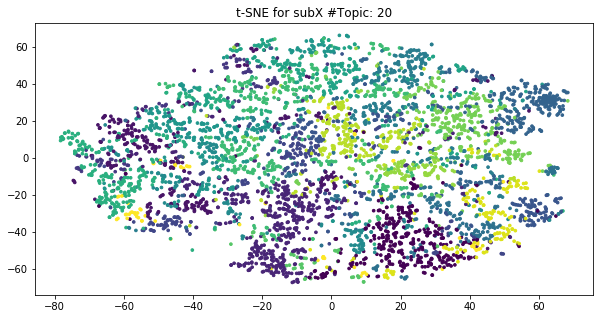

In [21]:
draw_latten_space(taskname='subX',model_name='VAE',n_topic=20)

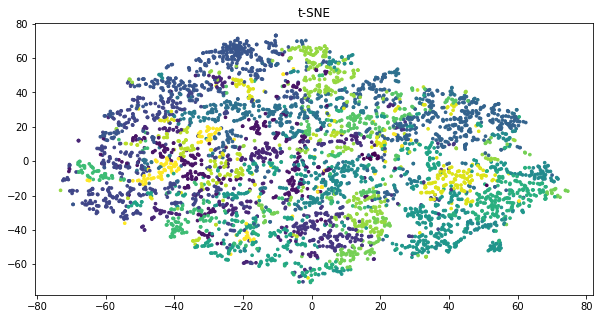

In [122]:
tsne1 = TSNE(n_components=2)
draw1 = tsne1.fit_transform(lattens)

plt.figure(figsize=(10,5))
plt.scatter(draw1[:,0],draw1[:,1],c=req_c,s=7)
plt.title('t-SNE')
plt.show()

Taskname:subX
build_bow is running...
264717 documents in total. Vocabulary size:38631
3.3380110263824463 s to finish build_bow.
Partition 0: 1381 clusters
Partition 1: 374 clusters
Partition 2: 174 clusters
Partition 3: 137 clusters
Partition 4: 128 clusters
Partition 5: 127 clusters


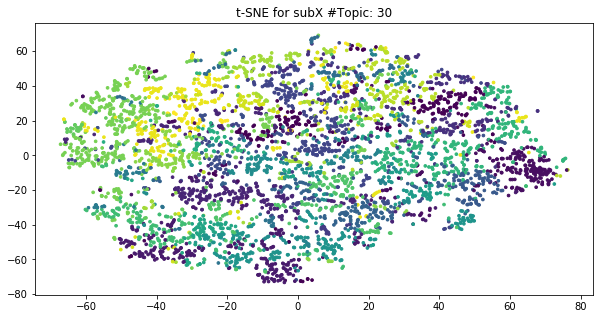

In [20]:
draw_latten_space(taskname='subX',model_name='VAE',n_topic=30)

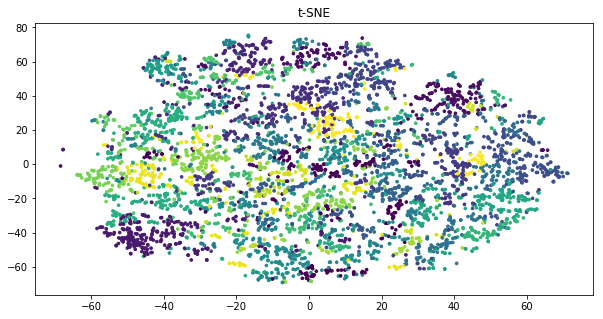

In [124]:
tsne1 = TSNE(n_components=2)
draw1 = tsne1.fit_transform(lattens)

plt.figure(figsize=(10,5))
plt.scatter(draw1[:,0],draw1[:,1],c=req_c,s=7)
plt.title('t-SNE')
plt.show()

Taskname:sohu100k
build_bow is running...
99935 documents in total. Vocabulary size:72444
5.041532278060913 s to finish build_bow.
Partition 0: 1201 clusters
Partition 1: 304 clusters
Partition 2: 101 clusters
Partition 3: 43 clusters
Partition 4: 32 clusters
Partition 5: 28 clusters
Partition 6: 27 clusters


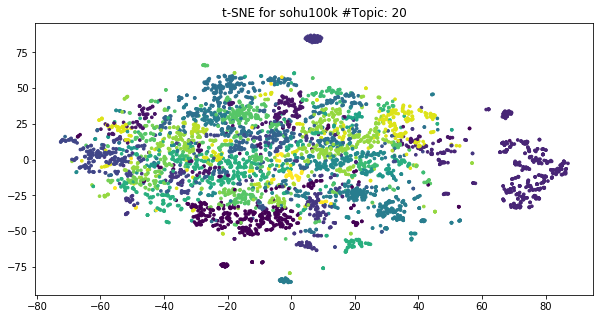

TypeError: 'NoneType' object is not iterable

In [30]:
lattens,req_c = draw_latten_space(taskname='sohu100k',model_name='VAE',n_topic=20)

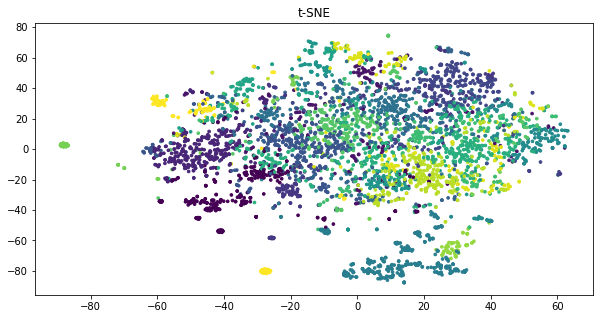

In [147]:
tsne1 = TSNE(n_components=2)
draw1 = tsne1.fit_transform(lattens)

plt.figure(figsize=(10,5))
plt.scatter(draw1[:,0],draw1[:,1],c=req_c,s=7)
plt.title('t-SNE')
plt.show()

In [ ]:
lattens,req_c = draw_latten_space(taskname='sohu100k',model_name='VAE',n_topic=30)

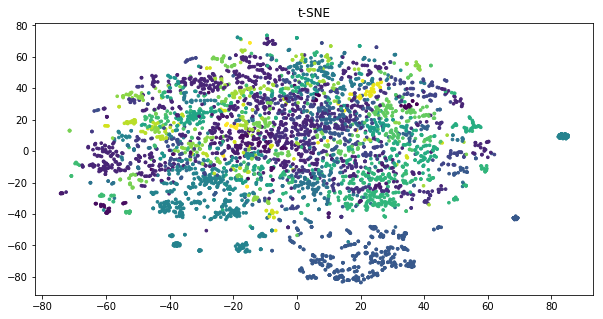

In [127]:
tsne1 = TSNE(n_components=2)
draw1 = tsne1.fit_transform(lattens)

plt.figure(figsize=(10,5))
plt.scatter(draw1[:,0],draw1[:,1],c=req_c,s=7)
plt.title('t-SNE')
plt.show()

In [32]:
def draw_latten_space_kmeans(taskname='cnews',model_name='VAE',n_topic=10,n_points=5000):
    use_stopwords = True
    batch_size = 256
    msg = 'BCE'
    run_name = '{}_K{}_{}_{}'.format(model_name,n_topic,taskname,msg)
    
    train_loader,vocab,txtDocs = get_batch(taskname,use_stopwords,batch_size)
    
    model = VAE(bow_size=len(vocab),h_dim=1024,z_dim=n_topic)
    
    model.load_state_dict(torch.load('ckpt/{}.model'.format(run_name)))
    model = model.cuda()
    
    latten = torch.tensor([]).cuda()
    cnt = 0
    for it in train_loader:
        it = it.cuda()
        out = model.encode(it)
        latten = torch.cat([latten,out[0]],dim=0)
        cnt += 1
        if cnt==20:
            break
    
    lattens = latten.cpu().detach().numpy()
    lattens = lattens[:n_points]
    
    #clustering
    kmeans = KMeans(n_clusters=n_topic,random_state=0).fit(lattens)
    req_c = kmeans.labels_
    
    tsne1 = TSNE(n_components=2,random_state=1024)
    draw1 = tsne1.fit_transform(lattens)

    #plt.figure(figsize=(10,5))
    plt.scatter(draw1[:,0],draw1[:,1],c=req_c,s=7)
    plt.title('t-SNE for {} #Topic: {}'.format(taskname,n_topic))
    plt.show()
    return lattens,req_c

Taskname:sub
build_bow is running...
53550 documents in total. Vocabulary size:12567
0.9583775997161865 s to finish build_bow.


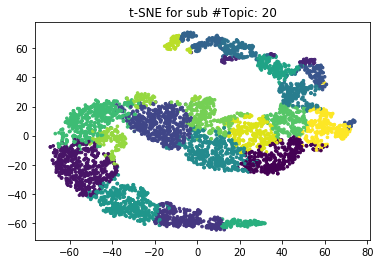

(array([[-0.56970507, -1.093029  ,  0.23385595, ..., -0.6300121 ,
          1.0762107 ,  0.61228377],
        [-0.39736864, -0.7288951 ,  0.15624781, ..., -0.45259976,
          0.72419417,  0.41997004],
        [-0.41068467, -0.7472869 ,  0.19518709, ..., -0.47479317,
          0.7328694 ,  0.46630868],
        ...,
        [-0.47061464, -0.7711335 ,  0.27976853, ..., -0.5192475 ,
          0.7261059 ,  0.5711779 ],
        [-0.50154924, -0.80582684,  0.25363582, ..., -0.53368527,
          0.7908242 ,  0.57308036],
        [-0.47368076, -0.89352125,  0.1754365 , ..., -0.5741938 ,
          0.9045077 ,  0.5232961 ]], dtype=float32),
 array([19, 10,  1, ..., 16, 16,  4], dtype=int32))

In [35]:
draw_latten_space_kmeans(taskname='sub',model_name='VAE',n_topic=20)

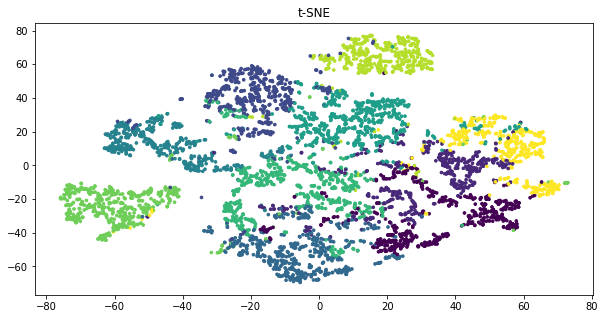

In [131]:
tsne1 = TSNE(n_components=2)
draw1 = tsne1.fit_transform(lattens)

plt.figure(figsize=(10,5))
plt.scatter(draw1[:,0],draw1[:,1],c=req_c,s=7)
plt.title('t-SNE')
plt.show()

In [ ]:
draw_latten_space_kmeans(taskname='sohu100k',model_name='VAE',n_topic=30)

Taskname:sohu100k
build_bow is running...
99935 documents in total. Vocabulary size:72444
5.350692987442017 s to finish build_bow.


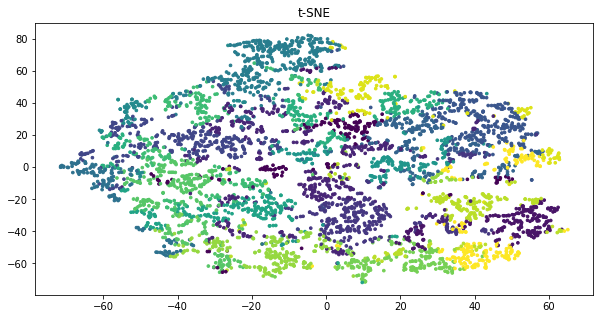

In [135]:
tsne1 = TSNE(n_components=2)
draw1 = tsne1.fit_transform(lattens)

plt.figure(figsize=(10,5))
plt.scatter(draw1[:,0],draw1[:,1],c=req_c,s=7)
plt.title('t-SNE')
plt.show()

In [142]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X[rand_X[j]].reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [143]:
hopkins(lattens)

0.8781647060863007

In [145]:
from sklearn import metrics

print(metrics.silhouette_score(lattens,req_c,metric='euclidean'))

0.16955246
